IMPORT PACKAGES

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot

IMPORT DATASET

CONVERT TIME COLUMN TO DATETIME

In [124]:
features_data = pd.read_csv("features_data.csv")
equity_data = pd.read_csv("equity_value_data.csv")
equity_data['timestamp'] = pd.to_datetime(equity_data['timestamp'])

DETERMINE CHURNED USERS FROM EQUITY DATASET

In [7]:
churned_users = set()


for i in range(1,len(equity_data['user_id'])):
  if equity_data['user_id'][i] == equity_data['user_id'][i-1]:
      if (equity_data['timestamp'][i] - equity_data['timestamp'][i-1]).days >= 28:
          churned_users.add(equity_data['user_id'][i])

ADD CHURNED COLUMN TO FEATURE DATASET

In [126]:
churned_column = []

for i in range(len(features_data['user_id'])):
  if features_data['user_id'][i] in churned_users:
    churned_column.append(1)
  else:
    churned_column.append(0)

features_data['churned'] = churned_column

DETERMINE CHURNED RATE

In [127]:
print(len(features_data[features_data['churned'] == 1])/len(features_data['user_id']))

0.006626074498567335


IMPORT CLASSIFIER PACKAGE

In [128]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.metrics import accuracy_score

EXTRACT FEATURES AND TARGET VARIABLE

In [129]:
target = features_data.churned
X = pd.get_dummies(features_data)
features = features_data.drop(['churned', 'user_id'], axis=1)
Xtrain, Xtest, ytrain, ytest = train_test_split(X, target, test_size=0.4, random_state=0)

FIT LOGISITC REGRESSION CLASSIFIER

DETERMINE AUC SCORE

In [148]:
#model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=1)
model = LogisticRegression(penalty='l2', solver='liblinear')
#model = tree.DecisionTreeClassifier()
model.fit(Xtrain, ytrain.values)
predictions = model.predict_proba(Xtest)[:,1]
roc_auc_score(ytest.values, predictions)

1.0

DETERMINE CORRELATION BTW CHURNED AND QUANTITATIVE VARIABLES

In [135]:
features_data.drop(['user_id'],axis = 1).corr()

,time_spent,first_deposit_amount,churned
time_spent,1.000000,-0.000770,-0.009604
first_deposit_amount,-0.000770,1.000000,-0.017223
churned,-0.009604,-0.017223,1.000000


DISTRIBUTION OF FEATURE WITH HIGHEST CORRELATION

(array([5.421e+03, 1.100e+02, 2.800e+01, 3.000e+00, 1.000e+01, 6.000e+00,
        2.000e+00, 1.000e+00, 1.000e+00, 2.000e+00]),
 array([    0.,  5000., 10000., 15000., 20000., 25000., 30000., 35000.,
        40000., 45000., 50000.]),
 <a list of 10 Patch objects>)

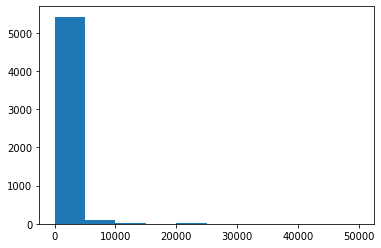

In [139]:
plt.hist(features_data['first_deposit_amount'])

FEATURE IMPORTANCE

In [147]:
import math
w = model.coef_[0]
feature_importance = pd.DataFrame(features_data.columns, columns = ["feature"])
feature_importance["importance"] = pow(math.e, w)
feature_importance = feature_importance.sort_values(by = ["importance"], ascending=False)
 
from sklearn.linear_model import LogisticRegression
ax = feature_importance.plot.barh(x='feature', y='importance')
plt.show()

ValueError: ignored